# Embeddings for Natural Language Processing from A to Z


## Basics: Representing Text in Natural Language Processing
- https://towardsdatascience.com/representing-text-in-natural-language-processing-1eead30e57d8

### Numerical Representation of Words
- At the base, processors in computers perform simple arithmetic such as adding and multiplying numbers
- In the case of , the area marked with a circle on the picture below is represented by three matrices of numbers, one for each color channel: red, green and blue. 
- Each number tells the level of red, green or blue at the pixel’s location. (0,0,0) is displayed as black, and a pixel whose color components are (255,255,255) is displayed as white.

![](https://miro.medium.com/max/600/1*NNVQM-A2Yg6_kTZJv2DPiQ.png)
- The process of transforming text into numeric stuff, similar to what we did with the image above, is usually performed by building a language model.
- The most common techniques are: 1-hot encoding, N-grams, Bag-of-words, vector semantics (tf-idf), distributional semantics (Word2vec, GloVe)

### 1 hot encoding
- If a document has a vocabulary with 1000 words, we can represent the words with one-hot vectors. 
- In other words, we have 1000-dimensional representation vectors, and we associate each unique word with an index in this vector. 
- To represent a unique word, we set the component of the vector to be 1, and zero out all of the other components.
![](https://miro.medium.com/max/610/1*2WsgxxOKt-BWt9_V-Joqmw.png)
- It misses the relationships between words and does not convey information about their surrounding context. 
- This method becomes extremely ineffective for large vocabularies

### N-grams language model
- N-gram language models estimate the probability of the last word given the previous words.
![](https://miro.medium.com/max/886/1*Ouc7b9cnprHjDgxbZGIBcA.png)
- Google (again) actually provides a larger set of probabilities for 1-grams, 2-grams, 3-grams, 4-grams, and 5-grams in multiple languages. 
- They calculated them on sources printed between 1500 and 2008! 
- The Google Ngram Viewer allows you to download and use this large collection of n-grams for the purpose of spell checking, auto-completing, language identification, text generation and speech recognition.
- Even with very large corpus, in general, N-gram is an insufficient model of language because language has long-distance dependencies. 
- For example, in the sentence *“The computer which I had just put into the machine room on the fifth floor crashed.”*, although the words “computer ” and “crashed ” are 15 positions away one from another, they are related
- Furthermore, the N-gram model is heavily dependent on the training corpus used to calculate the probabilities. 
- One implication of this is that the probabilities often encode specific facts about a given training text, which may not necessarily apply to a new text. 
- These reasons motivate us to look at further language models.

### Bag-of-words language model
- When we are interested in categorizing text, classifying it based on sentiment, or verifying whether it is a spam, we often do not want to look at the sequential pattern of words, as suggested by N-gram language models. 
- Rather we would represent the text as a bag of words, as if it were an unordered set of words, while ignoring their original position in the text, keeping only their frequency.
![](https://miro.medium.com/max/1054/1*uZrDcCBDbNnSYrkSCfjBTw.png)
- Let’s illustrate the bag-of-words representation of text in a simple sentiment analysis example with the two classes positive (+) and negative (-)
![](https://miro.medium.com/max/574/1*vtjcDhQcszwfN_uPYhNc6A.png)
- **Naive Bayes Classifier**, which uses the words frequencies in the bag-of-words of each class to compute the probability of each class c, as well as the conditional probability of each word given a class
![](https://miro.medium.com/max/642/1*CdksndGuiAitxQ2r-MI8tA.png)
- Bag-of-words language models rely on the term frequency TF, defined as the number of times that a word occurs in a given text or document. 
- Bag-of-words helps in sentiment analysis. It is great in detecting the language a text is written in. 
- It is also used to determine authorship attribution such as gender and age
- Despite of the glory, N-gram and Bag-of-words models alone do not allow us to draw useful inferences that will help us solve meaning-related tasks like question-answering, summarization, and dialogue

## Vector Semantics
- How should we represent the meaning of a word? 
- The word “mouse” can be found in a lexical dictionary, but its plural form “mice” will be not be described separately.
- We'll build a new model of meaning focusing on similarity. Each word = a vector

- Similarly “sing” as the lemma for “sing”, “sang”, “sung” will be described, but its tense forms will not. How do we tell a computer that all these words mean the same thing? The word “plant” can have a different meaning depending on the context

- Similar words are "nearby in space"

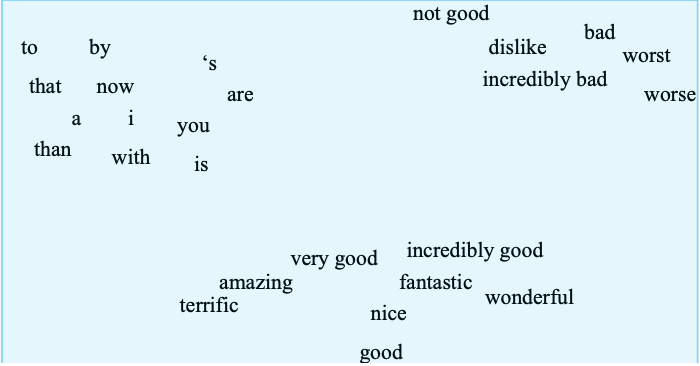



- Vector semantics is currently the best approach to building a computational model that successfully deals with the different aspects of word meaning including senses, hyponym, hypernym, antonym, synonym, homonym, similarity, relatedness, lexical fields, lexical frames, connotation

### Context
- In the example sentence “Tesla is building new plants”, these words and other similar context words that also occur around the word “factory” can help us discover the similarity between “plant” and “factory”
- We can define a word by counting what other words occur in its environment, and we can represent the word by a **vector**, a list of numbers, a point in N-dimensional space. Such a representation is usually called **embedding**, because it's embedded into a space. Computer can use this cheating trick to understand the meaning of words in its context.

### Two Kinds of Embeddings

#### Tf-idf
- A common baseline model
- Sparse vectors
- Words are represented by a simple function of the counts of nearby words

#### Word2vec
- Dense vectors
- Representation is created by training a classifier to distinguish nearby and far-away words


### Word-document Representation
- As illustration, each column in the table below represents one of 4 documents with the following titles: “As You Like It”, “Twelfth Night”, “Julius Caesar”, and “Henry V”. 
- Words which appear in the documents are represented as rows. These words build our vocabulary. 
- The table tells us that the word “battle” occurs 7 times in the document “Julius Caesar”. 
- This table is also called **term-document matrix**, where each row represents a word in the vocabulary and each column represents a document, a section, a paragraph, a tweet, a SMS, an email or whatever.
![](https://miro.medium.com/max/1090/1*inN3FXwQ3LHqcIWQG8XOpw.png)

- Now we can represent each document by a document vector, e.g. [7 62 1 2] for “Julius Caecar”. 
- We can even draw such vectors in a 2-dimensional vector space for any pair of words. 
- Below we have an example of such a graph. We see a spatial visualization of the document vectors of the space built by the dimensions “fool” and “battle”. 
- We can conclude that the documents “Henry V” and “Julius Caesar” have similar content, which is more related to “battle” than to “fool”. 
- For information retrieval we’ll also represent a query by a document vector, also of length 4 telling how often the words “battle”, “good”, “fool” and “wit” appear in the query. 
- The search results will be obtained by comparing the query vector with all four document vectors to find how similar they are.
![](https://miro.medium.com/max/1084/1*NLdCzNC_RFDZtqZghVakwA.png)

### Word-word representation : Word as vectors
- By looking at the rows of the term-document matrix, we can extract word vectors instead of column vectors. 
- As we saw that similar documents tend to have similar words, similar words have similar vectors because they tend to occur in similar documents. 
- If we now use words as columns of the term-document matrix, instead of documents, we obtain the so-called **word-word matrix**, **term-term matrix**, also called **term-context matrix**. 
- Each cell describes the number of times the row (target) word and the column (context) word co-occur in some context in some training corpus. 
- A simple case is when the context is a document, so the cell will tell how often two words appear in the same document. 
- A more frequent case is to count how often the column word appears within a words-window around the row word. In the example below “data” appears 6 times in the context of “information” when a 4-words-window around “information” is considered.

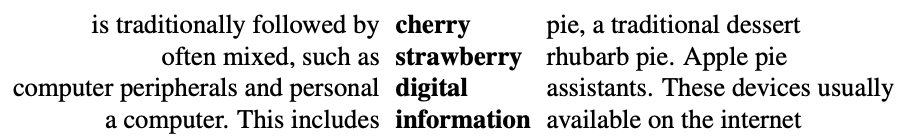

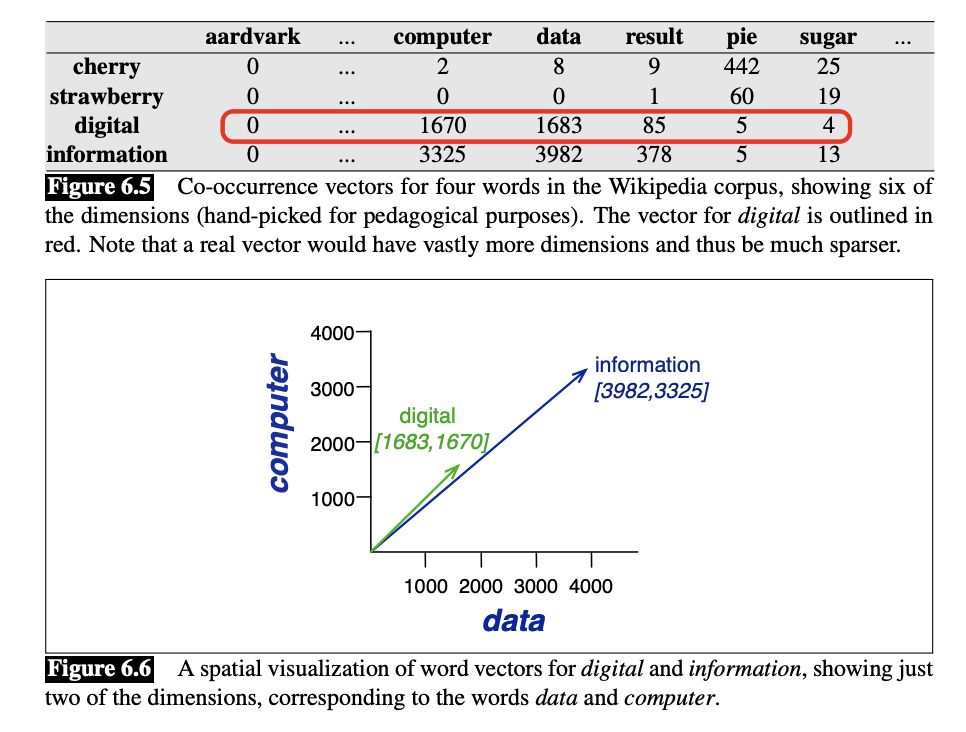

Note that |V|, the length of the vector, is generally the size of the vocabulary,
usually between 10,000 and 50,000 words (using the most frequent words in the
training corpus; keeping words after about the most frequent 50,000 or so is generally not helpful). But of course since most of these numbers are zero these are sparse
vector representations, and there are efficient algorithms for storing and computing
with sparse matrices.

### Cosine for measuring similarity

- The matrix above suggests that “cherry” and “strawberry” are similar to each other because “pie” and “sugar” tend to appear in their context. 

- Remiders from linear algebra

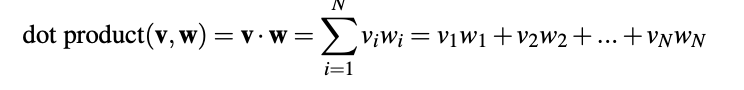

The dot product acts as a similarity metric because it will tend to be high
just when the two vectors have large values in the same dimensions. Alternatively,
vectors that have zeros in different dimensions—orthogonal vectors—will have a
dot product of 0, representing their strong dissimilarity.

This raw dot product, however, has a problem as a similarity metric: it favors
vector length long vectors. The vector length is defined as

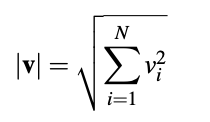

The dot product is higher if a vector is longer, with higher values in each dimension.
More frequent words have longer vectors, since they tend to co-occur with more
words and have higher co-occurrence values with each of them. The raw dot product
thus will be higher for frequent words. But this is a problem; we’d like a similarity
metric that tells us how similar two words are regardless of their frequency.


The simplest way to modify the dot product to normalize for the vector length is
to divide the dot product by the lengths of each of the two vectors. This **normalized
dot product** turns out to be the same as the cosine of the angle between the two
vectors, following from the definition of the dot product between two vectors a and
b:

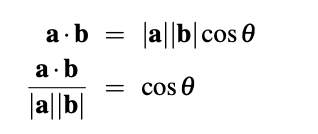

The cosine similarity metric between two vectors v and w thus can be computed as:

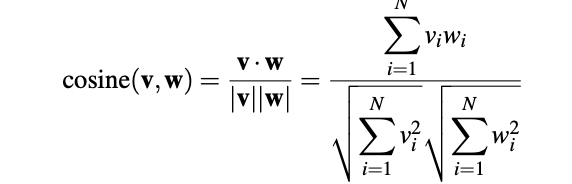

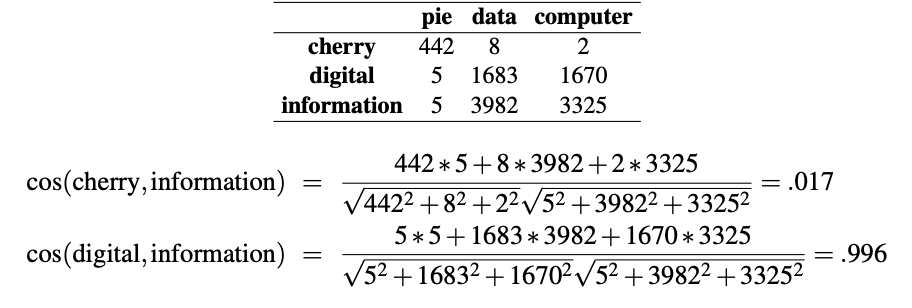

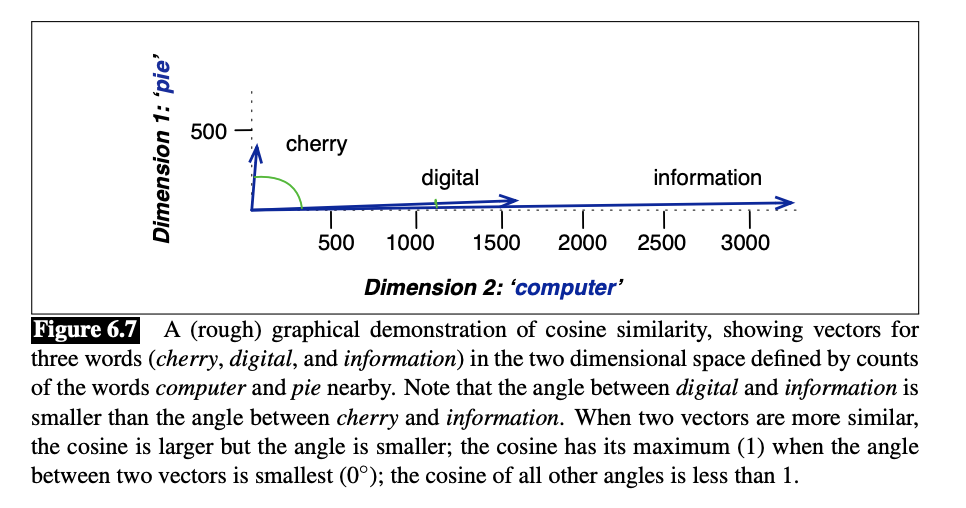

### TF-IDF: Weighting terms in the vector
- Vector semantic models use the raw frequency of the co-occurrence of two words. 
- In natural language, raw frequency is very skewed and not very discriminative. 
- As depicted in the histogram below, the word “the” is simply a frequent word and has roughly equivalent high frequencies in each of the documents or contexts.
![](https://miro.medium.com/max/1166/1*NX0wyTBKgjstICzNqAaeyw.png)
- There are few ways of dealing with this problem. TF-IDF algorithm is by far the dominant way of weighting co-occurrence matrices in natural language processing, especially in information retrieval. 
- The TF-IDF weight is computed as the product of the term frequency and the inverse document frequency. 
- It helps us to assign importance to more discriminative words. 
- The two components used to calculate the TF-IDF weight for each term t in our document d is described below.

#### Term frequency
![](https://miro.medium.com/max/664/1*4zx7nVVTWuZIcxVrgDSSLg.png)
- The term or word frequency is calculated as the number of times the word appears in the document. 
- Since a word appearing 100 times in a document doesn’t make that word 100 times more likely to be relevant to the meaning of the document, we use the natural logarithm to downweight the raw frequency a bit. 
- Words which occur 10 times in a document would have a tf=2. 
- Words which occur 100 times in a document means tf=3, 1000 times mean tf=4, etc.

#### Inverse document frequency
- The document frequency(dfi) of a given term or word is the number of documents it occurs in. 
- The inverse document frequency is the ratio of the total number of documents over the document frequency. 
- This gives a higher weight to words that occur only in a few documents. 
- Because of the large number of documents in many collections, a natural logarithm is usually applied to the inverse document frequency in order to avoid skewed distribution of IDF.
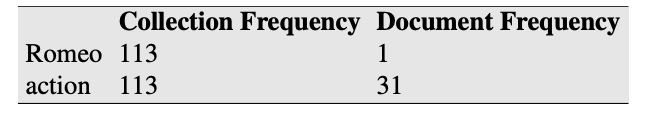

![](https://miro.medium.com/max/260/1*EVIwmbB9i1SdCPRwIzwBzA.png)

- Words like "the" or "good" have very low idf

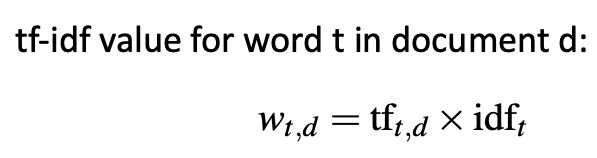


- Below on the left side of the image, we see the TF and IDF calculated for words from our example introduced previously. 
- On the right side of the image we show the raw frequency of each word in a given document, as well as its weighted TF-IDF value in the bottom table. 
- Because the word “good” appears with high frequency in all documents, its TF-IDF value turns to zero. 
- This allows more weight on the discriminative word “battle”, which originally has very low frequency.

![](https://miro.medium.com/max/1764/1*eKSkulRVv4eZHd7OezeFwA.png)

- Although Bag-of-words models, augmented with TF-IDF, are great models, there are semantic nuances, they are not able to capture. 
- Let’s show this on the following sentences: “The cat sat on the broken wall”, and, “The dog jumped over the brick structure”. 
- Although both sentences are presenting two separate events, their semantic meanings are similar to one another. 
- A dog is similar to a cat, because they share an entity called animal. 
- A wall could be viewed as similar to a brick structure. 
- Therefore, while the sentences discuss different events, they are semantically related to one another. 
- In the classical bag-of-words model (where words were encoded in their own dimensions), encoding such a semantic similarity is not possible. 
- Additionally such models exhibit few computational issues when a large vocabulary is used and word vectors become larger.